In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
df_predicted = pd.read_csv('/content/drive/MyDrive/빅예분3조/Data/prescale/KPU_DATA_MERGE1_MARCORV_PEREDICT.csv', encoding='euc-kr')

In [ ]:
#파이썬 컬럼 다 나오도록
pd.set_option('display.max_columns', None)

In [ ]:
df_predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                223 non-null    int64  
 1   Unnamed: 0.1              223 non-null    int64  
 2   Unnamed: 0.1.1            223 non-null    int64  
 3   ACPT_YM                   223 non-null    int64  
 4   PLCST_NM                  223 non-null    object 
 5   RPRT_CASCNT_WHOL          223 non-null    int64  
 6   TIZN_1                    223 non-null    int64  
 7   TIZN_2                    223 non-null    int64  
 8   TIZN_3                    223 non-null    int64  
 9   TIZN_4                    223 non-null    int64  
 10  OCRN_DOTW_SNDD            223 non-null    int64  
 11  OCRN_DOTW_MON             223 non-null    int64  
 12  OCRN_DOTW_TUE             223 non-null    int64  
 13  OCRN_DOTW_WED             223 non-null    int64  
 14  OCRN_DOTW_

In [ ]:
del df_predicted['Unnamed: 0']
del df_predicted['Unnamed: 0.1']
del df_predicted['Unnamed: 0.1.1']

In [ ]:
df_plcst_nm = df_predicted['PLCST_NM']
plsct_nm_list = df_plcst_nm.to_list()
plsct_nm_list = list(set(plsct_nm_list))

In [ ]:
len(plsct_nm_list)

223

In [ ]:
target_column_list = ['TIZN_1','TIZN_2','TIZN_3','TIZN_4','OCRN_DOTW_SNDD','OCRN_DOTW_MON','OCRN_DOTW_TUE','OCRN_DOTW_WED','OCRN_DOTW_THU','OCRN_DOTW_FRI','OCRN_DOTW_SAT']

In [ ]:
from sklearn.metrics import *

In [ ]:
for tgt in target_column_list:
  print(tgt)
  r2 = r2_score(df_predicted[tgt].values, df_predicted['PREDICTED_'+tgt].values)
  print(r2)

TIZN_1
0.8255770714117372
TIZN_2
0.7169247419055287
TIZN_3
-3.952074840841595
TIZN_4
-9.746743447404429
OCRN_DOTW_SNDD
0.2098178132934987
OCRN_DOTW_MON
0.5581623357396347
OCRN_DOTW_TUE
0.45994337739756785
OCRN_DOTW_WED
0.6830654793440434
OCRN_DOTW_THU
0.6903568612247595
OCRN_DOTW_FRI
0.6561363217422786
OCRN_DOTW_SAT
0.42594079490914194


In [ ]:
df_predicted.columns

Index(['ACPT_YM', 'PLCST_NM', 'RPRT_CASCNT_WHOL', 'TIZN_1', 'TIZN_2', 'TIZN_3',
       'TIZN_4', 'OCRN_DOTW_SNDD', 'OCRN_DOTW_MON', 'OCRN_DOTW_TUE',
       'OCRN_DOTW_WED', 'OCRN_DOTW_THU', 'OCRN_DOTW_FRI', 'OCRN_DOTW_SAT',
       'ADDR', 'SI', 'SGG', 'LON', 'LAT', 'TIZN_1_STATE', 'TIZN_2_STATE',
       'TIZN_3_STATE', 'TIZN_4_STATE', 'OCRN_DOTW_SNDD_STATE',
       'OCRN_DOTW_MON_STATE', 'OCRN_DOTW_TUE_STATE', 'OCRN_DOTW_WED_STATE',
       'OCRN_DOTW_THU_STATE', 'OCRN_DOTW_FRI_STATE', 'OCRN_DOTW_SAT_STATE',
       'PREDICTED_TIZN_1', 'PREDICTED_TIZN_2', 'PREDICTED_TIZN_3',
       'PREDICTED_TIZN_4', 'PREDICTED_OCRN_DOTW_SNDD',
       'PREDICTED_OCRN_DOTW_MON', 'PREDICTED_OCRN_DOTW_TUE',
       'PREDICTED_OCRN_DOTW_WED', 'PREDICTED_OCRN_DOTW_THU',
       'PREDICTED_OCRN_DOTW_FRI', 'PREDICTED_OCRN_DOTW_SAT'],
      dtype='object')

In [ ]:
data = df_predicted[['PLCST_NM','TIZN_1','PREDICTED_TIZN_1','LAT','LON']]
data = data.set_index('PLCST_NM')
data

,TIZN_1,PREDICTED_TIZN_1,LAT,LON
PLCST_NM,,,,
ETC,157,153.465278,126.713400,35.973544
천안동남경찰서,25,18.444444,127.156057,36.786847
화성동탄경찰서,30,26.916667,127.077415,37.207494
마산중부경찰서,4,6.000000,128.564082,35.192208
울산중부경찰서,30,26.412698,129.349216,35.569829
...,...,...,...,...
인천논현경찰서,18,18.080247,126.715039,37.404077
부산중부경찰서,12,9.166667,129.035925,35.107421
대전서부경찰서,8,16.666667,127.373459,36.309045


In [ ]:
data = data[(data['PLCST_NM'] != '고성경찰서') & (data['PLCST_NM'] != '교통과') & (data['PLCST_NM'] != '청원경찰서') & (data['PLCST_NM'] != '제주경찰서') ]

In [ ]:
sudo_data = df_predicted[(df_predicted['SI']=='서울특별시') | (df_predicted['SI']=='경기도')][['PLCST_NM','TIZN_1','PREDICTED_TIZN_1']]
sudo_data = sudo_data.set_index('PLCST_NM')
sudo_data

,TIZN_1,PREDICTED_TIZN_1
PLCST_NM,,
화성동탄경찰서,30,26.916667
서울노원경찰서,36,37.079365
동두천경찰서,8,14.651235
군포경찰서,16,24.111111
일산서부경찰서,18,25.000000
...,...,...
고양경찰서,31,28.263889
서울종로경찰서,1,3.265306
수원서부경찰서,32,20.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [ ]:
  #한글깨짐 시 실행 후 런타임 재시작
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (43.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import platform

print(platform.system()) # 플랫폼 확인

# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

Linux


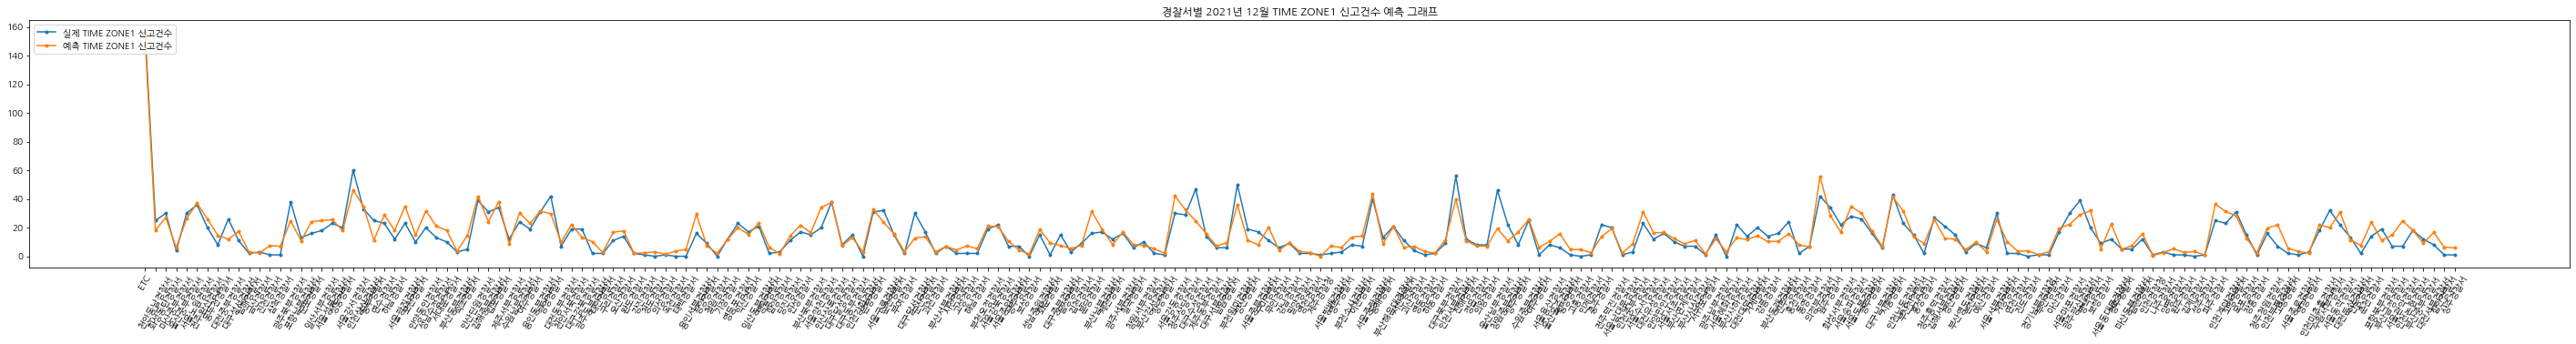

In [ ]:
plt.figure(figsize=(50, 5))
plt.plot(data, marker = 'o', markersize = 3)
plt.legend(['실제 TIME ZONE1 신고건수','예측 TIME ZONE1 신고건수'], loc='upper left')
plt.xticks(rotation=60)

plt.title("경찰서별 2021년 12월 TIME ZONE1 신고건수 예측 그래프")

matplotlib.rc('axes', unicode_minus=False)

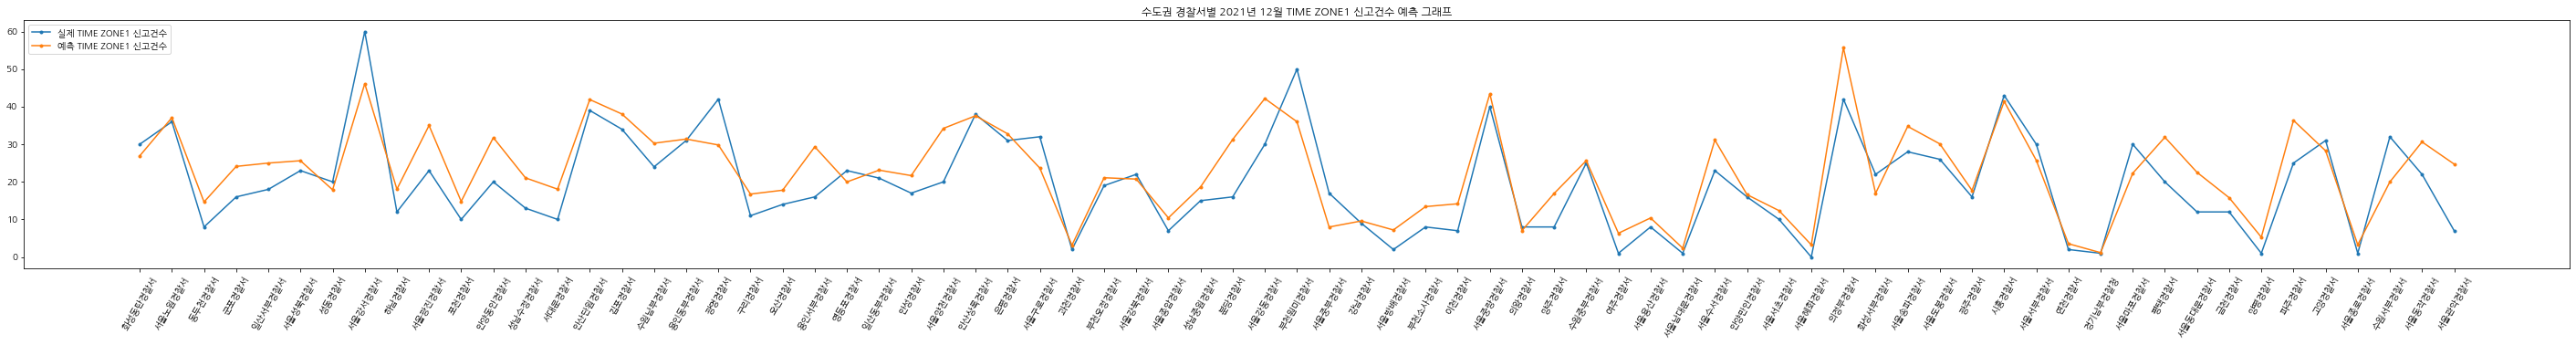

In [ ]:
plt.figure(figsize=(50, 5))
plt.plot(sudo_data, marker = 'o', markersize = 3)
plt.legend(['실제 TIME ZONE1 신고건수','예측 TIME ZONE1 신고건수'], loc='upper left')
plt.xticks(rotation=60)

plt.title("수도권 경찰서별 2021년 12월 TIME ZONE1 신고건수 예측 그래프")

matplotlib.rc('axes', unicode_minus=False)

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
import math

In [ ]:
map = folium.Map(location = [36,127], zoom_start = 9)
for i in data.index:
  name = i
  lat = data.loc[i, "LAT"]
  lon = data.loc[i, "LON"]
  pred = data.loc[i,"PREDICTED_TIZN_1"]
  pred = round(pred)
  if np.isnan(lat) == False:
    folium.Circle([lon,lat], radius= pred*50, tooltip=i+'  예측 건수:'+str(pred), color='#FF0000', fill=True, fill_color="'#FF0000'").add_to(map)

In [ ]:
map